In [1]:
import json
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import koreanize_matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import glob
# 데이터 전처리 후 시각화에 도움을 주는 라이브러리
import missingno as msno
# from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline, Pipeline, FeatureUnion, make_union
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import collections
import imblearn
from imblearn.over_sampling import ADASYN, RandomOverSampler, SMOTENC, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN, SMOTETomek
import os
from bayes_opt import BayesianOptimization
from sklearn.base import TransformerMixin
from sklearn.base import BaseEstimator
from sklearn.decomposition import PCA

import tensorflow as tf
from scipy.stats import chi2_contingency, ttest_ind
import category_encoders as CE

# import eli5
# from eli5.sklearn import PermutationImportance

# for dirname, _, filenames in os.walk('../kaggle/MLproject_dataset'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('/Users/minsoo/Downloads/archive/Cleaned-Data.csv')
df

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other


In [3]:
df.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [4]:
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras.models import Model
# from transformers import AutoTokenizer, TFAutoModel
# import json
 
# # BERT 토크나이저 로드
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# # 말뭉치 데이터셋 준비
# # JSON 형식의 학습 데이터셋 로드
# with open('/Users/minsoo/Downloads/154.의료, 법률 전문 서적 말뭉치/01.데이터/Training/02.라벨링데이터/Training_medical.json', 'r') as file:
#     data = json.load(file)

# # 학습 데이터셋 전처리
# texts = []
# labels = []

# for entry in data['data']:
#     text = entry['text']
#     category = entry['category']
#     keywords = entry['keyword']
#     label = f"{category} {'/'.join(keywords)}"
#     texts.append(text)
#     labels.append(label)

# # 레이블을 숫자로 인코딩
# from sklearn.preprocessing import LabelEncoder
# label_encoder = LabelEncoder()
# encoded_labels = label_encoder.fit_transform(labels)

# # 토큰화 및 패딩
# encoded_texts = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")

# # BERT 모델 로드
# bert_model = TFAutoModel.from_pretrained("bert-base-uncased", output_hidden_states=False, return_dict=False)

# # 모델 구성
# input_ids = Input(shape=(512,), dtype=tf.int32)
# bert_output = bert_model(input_ids)
# x = Dense(128, activation='relu')(bert_output[1])  # Use the pooled_output from BERT
# outputs = Dense(len(label_encoder.classes_), activation='softmax')(x)
# model = Model(inputs=input_ids, outputs=outputs)

# # 모델 컴파일
# model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# # 모델 훈련
# batch_size = 128
# num_epochs = 3
# model.fit(encoded_texts["input_ids"], encoded_labels, epochs=num_epochs, batch_size=batch_size)

# # 예측하기
# new_texts = ["New text data 1", "New text data 2"]
# new_text_vectors = tokenizer(new_texts, padding=True, truncation=True, return_tensors="tf")["input_ids"]
# predictions = model.predict(new_text_vectors)

# # 예측 결과 출력
# for text, prediction in zip(new_texts, predictions):
#     predicted_label = label_encoder.inverse_transform([tf.argmax(prediction)])
#     print(f"Text: {text}, Predicted Label: {predicted_label[0]}")


In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from transformers import AutoTokenizer
import json
from sklearn.preprocessing import LabelEncoder

# BERT 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# 말뭉치 데이터셋 준비
# JSON 형식의 학습 데이터셋 로드
with open('/Users/minsoo/Downloads/154.의료, 법률 전문 서적 말뭉치/01.데이터/Training/02.라벨링데이터/Training_medical.json', 'r') as file:
    data = json.load(file)

print(data)
# 학습 데이터셋 전처리
texts = []
labels = []

for entry in data['data']:
    text = entry['text']
    category = entry['category']
    keywords = entry['keyword']
    label = f"{category} {'/'.join(keywords)}"
    texts.append(text)
    labels.append(category)

# 레이블을 숫자로 인코딩
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 토큰화 및 패딩
encoded_texts = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")

# 단순한 Dense 모델 구성
input_ids = Input(shape=(512,), dtype=tf.int32)
embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer.get_vocab()), output_dim=128)(input_ids)
flatten_layer = Flatten()(embedding)
outputs = Dense(len(set(encoded_labels)), activation='softmax')(flatten_layer)
model = Model(inputs=input_ids, outputs=outputs)

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 훈련
batch_size = 64
num_epochs = 10
model.fit(encoded_texts["input_ids"], encoded_labels, epochs=num_epochs, batch_size=batch_size)


In [15]:
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from transformers import AutoTokenizer, TFAutoModel
import json
from sklearn.preprocessing import LabelEncoder

# BERT 토크나이저 로드
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# 말뭉치 데이터셋 준비
# JSON 형식의 학습 데이터셋 로드
with open('/Users/minsoo/Downloads/154.의료, 법률 전문 서적 말뭉치/01.데이터/Training/02.라벨링데이터/Training_medical.json', 'r') as file:
    data = json.load(file)

# print(data)
# 학습 데이터셋 전처리
texts = []
labels = []

for entry in data['data']:
    text = entry['text']
    category = entry['category']
    keywords = entry['keyword']
    label = f"{category}{'/'.join(keywords)}"
    texts.append(text)
    labels.append(label)


# 토큰화 및 패딩
encoded_texts = tokenizer(texts, padding=True, truncation=True, return_tensors="tf")

# LSTM 모델 구성
input_ids = Input(shape=(512,), dtype=tf.int32)
embedding = tf.keras.layers.Embedding(input_dim=len(tokenizer.get_vocab()), output_dim=128)(input_ids)
lstm_layer = LSTM(128, return_sequences=False)(embedding)
flatten_layer = Flatten()(lstm_layer)
outputs = Dense(len(set(labels)), activation='softmax')(flatten_layer)
model = Model(inputs=input_ids, outputs=outputs)

# 모델 컴파일
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 레이블을 숫자로 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# 모델 훈련
batch_size = 64
num_epochs = 10
model.fit(encoded_texts["input_ids"], encoded_labels, epochs=num_epochs, batch_size=batch_size)

Epoch 1/10
587/587 [==============================] - 264s 448ms/step - loss: 10.6270 - accuracy: 0.0000e+00
Epoch 2/10
587/587 [==============================] - 264s 450ms/step - loss: 10.5627 - accuracy: 2.6662e-05
Epoch 3/10
587/587 [==============================] - 266s 454ms/step - loss: 10.5114 - accuracy: 7.9985e-05
Epoch 4/10
587/587 [==============================] - 267s 455ms/step - loss: 10.1919 - accuracy: 2.1329e-04
Epoch 5/10
587/587 [==============================] - 268s 456ms/step - loss: 9.3718 - accuracy: 6.1322e-04
Epoch 6/10
587/587 [==============================] - 268s 457ms/step - loss: 8.2132 - accuracy: 0.0054
Epoch 7/10
587/587 [==============================] - 272s 463ms/step - loss: 7.0820 - accuracy: 0.0341
Epoch 8/10
587/587 [==============================] - 5096s 9s/step - loss: 6.0693 - accuracy: 0.1495
Epoch 9/10
587/587 [==============================] - 4924s 8s/step - loss: 5.1614 - accuracy: 0.3749
Epoch 10/10
587/587 [=======================

In [14]:
# 예측하기
new_texts = ["목이 조금 아프고, 춥습니다.", "콧물이 계속 나오고 가래가 자주 끓습니다.", "전형적인 목감기 증상입니다.", "뼈가 부러졌습니다."]
new_text_vectors = tokenizer(new_texts, padding=True, truncation=True, return_tensors="tf")["input_ids"]

# 길이가 512가 아닌 경우 모델 입력 시퀀스 길이에 맞게 패딩
max_length = 512
if new_text_vectors.shape[1] < max_length:
    padding_length = max_length - new_text_vectors.shape[1]
    new_text_vectors = tf.pad(new_text_vectors, paddings=[[0, 0], [0, padding_length]], constant_values=tokenizer.pad_token_id)

predictions = model.predict(new_text_vectors)

# 예측 결과 출력
for text, prediction in zip(new_texts, predictions):
    predicted_label = label_encoder.inverse_transform([tf.argmax(prediction)])
    print(f"Text: {text}, Predicted Label: {predicted_label[0]}")

1/1 [==============================] - 0s 41ms/step
Text: 목이 조금 아프고, 춥습니다., Predicted Label: 산부인과학
Text: 콧물이 계속 나오고 가래가 자주 끓습니다., Predicted Label: 산부인과학
Text: 전형적인 목감기 증상입니다., Predicted Label: 산부인과학
Text: 뼈가 부러졌습니다., Predicted Label: 산부인과학


In [ ]:
import json

# 말뭉치 데이터셋 준비
# JSON 형식의 학습 데이터셋 로드
with open('/Users/minsoo/Downloads/154.의료, 법률 전문 서적 말뭉치/01.데이터/Training/02.라벨링데이터/Training_medical.json', 'r') as file:
    data = json.load(file)

print(data)

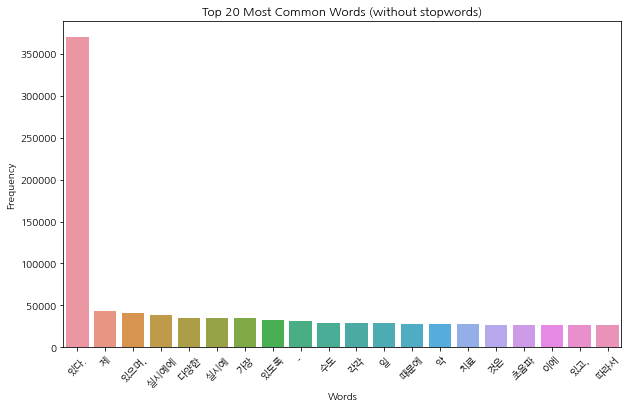

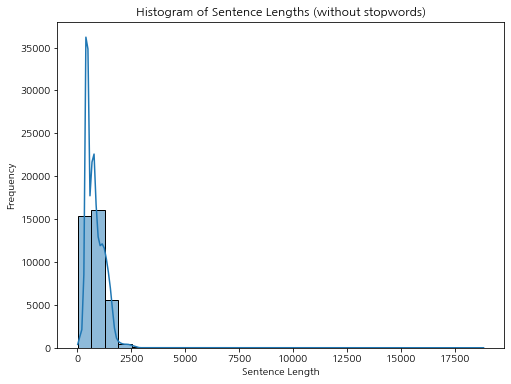

In [13]:
import json
import koreanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

# JSON 형식의 학습 데이터셋 로드
with open('/Users/minsoo/Downloads/154.의료, 법률 전문 서적 말뭉치/01.데이터/Training/02.라벨링데이터/Training_medical.json', 'r') as file:
    data = json.load(file)

# 한글 불용어 사전 정의
stopwords = ["은", "는", "이", "가", "을", "를", "으로", "로", "에", "에서", "의", "과", "와", "과의", "와의", "으로서", "로서", "이란", "이라는", "이야",
             "이랑", "입니다", "하는", "하다", "되다", "한다", "그", "저", "그런", "저런", "이런", "저런", "그리고", "그래서", "하지만", "그러나", "그래도", "또는",
             "혹은", "하기", "때문", "그래서", "너무", "모든", "때", "할", "수", "있는", "있습니다", "없는", "같은", "해야", "합니다", "있다", "상기", "및", "본", "도", 
             "발명의", "한다.", "의해", "따른", "따라", "후", ":", "대한", "다른", "위한", "경우", "것이", "바와", "된다.", "통해", "것이다.", "같이", "것을", "1", "또한,",
             "이러한", "더", "위해", "내지", "계1", "이용하여", "계", "의한", "것으로", "또한", "있으며", "계2", "환자의", "제1", "제2", "있으며", "중", "한",
             "같이,", "발명에", "도시된", "2", "각", "등의", "동안", "예를"]

# 학습 데이터셋 전처리
texts = []
labels = []

for entry in data['data']:
    text = entry['text']
    category = entry['category']
    keywords = entry['keyword']
    label = f"{category} {'/'.join(keywords)}"
    texts.append(text)
    labels.append(label)

# 단어 빈도 시각화 (불용어 제거)
word_freq = Counter(" ".join(texts).split())
for stopword in stopwords:
    del word_freq[stopword]

word_freq_most_common = word_freq.most_common(20)  # 가장 빈도가 높은 20개의 단어
words, freq = zip(*word_freq_most_common)

plt.figure(figsize=(10, 6))
sns.barplot(x=list(words), y=list(freq))
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words (without stopwords)")
plt.xticks(rotation=45)
plt.show()

# 문장 길이 히스토그램 (불용어 제거)
sentence_lengths = [len([word for word in text.split() if word not in stopwords]) for text in texts]

plt.figure(figsize=(8, 6))
sns.histplot(sentence_lengths, bins=30, kde=True)
plt.xlabel("Sentence Length")
plt.ylabel("Frequency")
plt.title("Histogram of Sentence Lengths (without stopwords)")
plt.show()

